# 작업1유형 - 20분

## Q1. 20L가격과 5L가격이 모두 0원이 아닌 데이터만 필터를 한 후, 각 row별로 20L가격과 5L가격의 차이를 ‘차이가격’ 이라 부른다고 하자. 시도명 별 차이가격의 평균가격을 비교할때 그 값이 가장 큰 금액을 반올림하여 소숫점 이하 1자리까지 구하여라

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e5_p1_1_.csv')
df.head(5)

,시도명,시군구명,종량제봉투종류,종량제봉투처리방식,종량제봉투용도,종량제봉투사용대상,1L가격,1.5L가격,2L가격,2.5L가격,...,60L가격,75L가격,100L가격,120L가격,125L가격,관리부서명,관리부서전화번호,데이터기준일자,제공기관코드,제공기관명
0,경기도,안양시,규격봉투,매립용,생활쓰레기,사업장용,0,0,0,0,...,0,2100,0,0,0,자원순환과,031-8045-5448,2022-08-12,3830000,경기도 안양시
1,경기도,안양시,규격봉투,매립용,생활쓰레기,기타,0,0,0,0,...,0,2100,0,0,0,자원순환과,031-8045-5448,2022-08-12,3830000,경기도 안양시
2,경기도,안양시,규격봉투,소각용,음식물쓰레기,가정용,0,50,0,80,...,0,0,0,0,0,자원순환과,031-8045-5448,2022-08-12,3830000,경기도 안양시
3,경기도,안양시,규격봉투,소각용,음식물쓰레기,사업장용,0,50,0,80,...,0,0,0,0,0,자원순환과,031-8045-5448,2022-08-12,3830000,경기도 안양시
4,경기도,안양시,규격봉투,소각용,음식물쓰레기,기타,0,50,0,80,...,0,0,0,0,0,자원순환과,031-8045-5448,2022-08-12,3830000,경기도 안양시


In [2]:
df.shape

(762, 26)

In [4]:
df.columns

Index(['시도명', '시군구명', '종량제봉투종류', '종량제봉투처리방식', '종량제봉투용도', '종량제봉투사용대상', '1L가격',
       '1.5L가격', '2L가격', '2.5L가격', '3L가격', '5L가격', '10L가격', '20L가격', '30L가격',
       '50L가격', '60L가격', '75L가격', '100L가격', '120L가격', '125L가격', '관리부서명',
       '관리부서전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [14]:
target_df = df[(df['20L가격'] != 0) & (df['5L가격'] !=0 )]
target_df['차이가격'] = target_df['20L가격'] - target_df['5L가격']
target_cost = target_df.groupby('시도명',as_index=False)['차이가격'].mean().sort_values('차이가격',ascending=False).head(1)['차이가격']
round(target_cost,1)

C:\Users\yesol\AppData\Local\Temp\ipykernel_17580\1361404409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['차이가격'] = target_df['20L가격'] - target_df['5L가격']


11    619.0
Name: 차이가격, dtype: float64

## Q2. BMI는 몸무게(kg) / (키(M) * 키(M)) 로 정의 된다. 초고도 비만은 BMI 25이상 , 고도 비반은 BMI 25미만 - 23이상 , 정상은 23미만 - 18.5이상 저체중은 18.5미만으로 정의 된다. 주어진 데이터에서 초고도비만 인원 + 저체중 인원 의 숫자는?

In [15]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e5_p1_2_.csv')
df.head(5)

,ID,height(cm),weight(kg)
0,user_1,173.0,67.5
1,user_2,149.5,82.5
2,user_3,143.8,64.6
3,user_4,163.1,87.2
4,user_5,159.6,77.1


In [18]:
import numpy as np
df['BMI'] = df['weight(kg)'] / ((df['height(cm)']/100)**2)
df['비만도']= np.where(df['BMI']>=25,"초고도비만", np.where(df['BMI']>=23,"고도비만",np.where(df['BMI']>=18.5,"정상","저체중")))
df.head()


,ID,height(cm),weight(kg),BMI,비만도
0,user_1,173.0,67.5,22.553376,정상
1,user_2,149.5,82.5,36.912339,초고도비만
2,user_3,143.8,64.6,31.240268,초고도비만
3,user_4,163.1,87.2,32.779971,초고도비만
4,user_5,159.6,77.1,30.268340,초고도비만


In [20]:
df[(df['비만도'] == "초고도비만") | (df['비만도'] == "저체중")].shape[0]

8998

## Q3. 순유입인원은 초중고 도내,도외 전입인원에서 초중고 도내, 도외 전출인원을 뺀값이다. 각년도별로 가장 큰 순유입인원을 가진 지역구의 순유입인원을 구하고 전체 기간의 해당 순유입인원들의 합을 구하여라

In [21]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e5_p1_3.csv')
df.head(5)

,지역,초등학교_전출_도내,초등학교_전출_도외,초등학교_전입_도내,초등학교_전입_도외,중학교_전출_도내,중학교_전출_도외,중학교_전입_도내,중학교_전입_도외,고등학교_전출_도내,고등학교_전출_도외,고등학교_전입_도내,고등학교_전입_도외,년도
0,종로구,221,132,255,126,63,71,104,73,203,72,166,75,2012
1,중구,295,139,203,100,66,43,58,44,156,37,104,39,2012
2,용산구,380,269,302,174,134,78,91,106,102,66,113,48,2012
3,성동구,643,344,376,221,154,103,98,82,179,37,153,41,2012
4,광진구,560,382,595,312,165,158,158,118,115,70,154,66,2012


In [22]:
df.shape

(250, 14)

In [23]:
df.columns

Index(['지역', '초등학교_전출_도내', '초등학교_전출_도외', '초등학교_전입_도내', '초등학교_전입_도외',
       '중학교_전출_도내', '중학교_전출_도외', '중학교_전입_도내', '중학교_전입_도외', '고등학교_전출_도내',
       '고등학교_전출_도외', '고등학교_전입_도내', '고등학교_전입_도외', '년도'],
      dtype='object')

In [33]:
전출 = [col for col in df.columns if "전출" in col]
전입 = [col for col in df.columns if "전입" in col]
df['순유입인원'] = df[전입].sum(axis=1) - df[전출].sum(axis=1)
df.groupby('년도',as_index=False).agg(max_순유입=('순유입인원','max'))

,년도,max_순유입
0,2012,949
1,2013,1339
2,2014,2225
3,2015,1498
4,2016,774
5,2017,932
6,2018,1158
7,2019,1821
8,2020,1762
9,2021,1395


In [35]:
df.groupby('년도',as_index=False).agg(max_순유입=('순유입인원','max'))['max_순유입'].sum()

13853

# 작업 2유형 - 25분 

## Q1. 벤츠 차량 가격 예측, 예측 변수 price, test.csv에 대해 ID별로 price 값을 예측하여 제출, 제출 데이터 컬럼은 ID와 price 두개만 존재해야함. 평가지표는 rmse

In [51]:
import pandas as pd
train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e5_p2_train_.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e5_p2_test_.csv')

display(train.head(2))
test.head(2)

,ID,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,10170,A Class,2012,11940,Automatic,46000,Diesel,30,64.2,2.1
1,9551,CL Class,2020,38624,Semi-Auto,19,Petrol,150,36.7,2.0


,ID,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,SLK,2005,Automatic,63000,Petrol,325,32.1,1.8
1,2,SL CLASS,2016,Automatic,6200,Petrol,555,28.0,5.5


In [37]:
sum(train.isna().sum()), sum(test.isna().sum())

(0, 0)

In [40]:
train.describe()

,ID,year,price,mileage,tax,mpg,engineSize
count,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000
mean,6537.860328,2017.291764,24725.670671,21920.129797,129.983712,55.086633,2.073073
std,3788.746072,2.239658,11849.430688,21266.824972,64.754362,15.343101,0.572922
min,1.000000,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,3247.500000,2016.000000,17450.000000,6058.500000,125.000000,45.600000,1.800000
50%,6516.000000,2018.000000,22480.000000,15181.000000,145.000000,56.500000,2.000000
75%,9816.500000,2019.000000,28990.000000,31695.500000,145.000000,64.200000,2.100000
max,13118.000000,2020.000000,154998.000000,259000.000000,580.000000,217.300000,6.200000


In [41]:
train.describe(include="object")

,model,transmission,fuelType
count,9823,9823,9823
unique,26,4,4
top,C Class,Semi-Auto,Diesel
freq,2796,5146,6864


<Axes: >

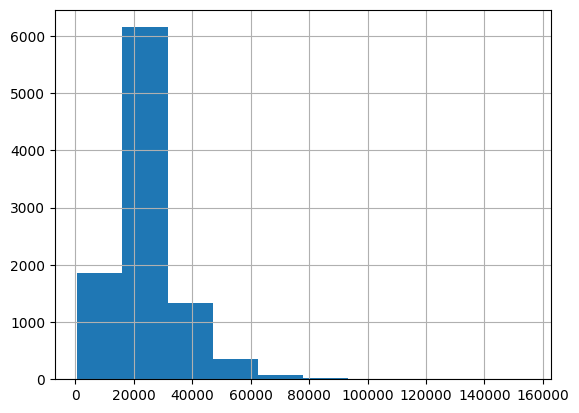

In [42]:
import matplotlib.pyplot as plt
train['price'].hist()

In [52]:
df = pd.concat([train,test],axis=0)
df

,ID,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,10170,A Class,2012,11940.0,Automatic,46000,Diesel,30,64.2,2.1
1,9551,CL Class,2020,38624.0,Semi-Auto,19,Petrol,150,36.7,2.0
2,1790,A Class,2013,8500.0,Manual,69031,Petrol,125,51.4,1.6
3,10018,B Class,2015,13998.0,Automatic,34739,Diesel,125,56.5,2.1
4,142,E Class,2017,20998.0,Semi-Auto,21352,Diesel,20,72.4,2.0
...,...,...,...,...,...,...,...,...,...,...
3291,13096,GLE Class,2016,NaN,Automatic,27804,Diesel,260,42.8,3.0
3292,13098,C Class,2019,NaN,Automatic,10635,Petrol,145,44.1,1.5
3293,13101,GLC Class,2016,NaN,Automatic,14000,Diesel,125,56.5,2.1
3294,13109,A Class,2017,NaN,Automatic,20477,Diesel,145,68.9,2.1


In [53]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
object_cols = df.select_dtypes(include="object").columns
for col in object_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder
print(object_cols)
print(encoders)

Index(['model', 'transmission', 'fuelType'], dtype='object')
{'model': LabelEncoder(), 'transmission': LabelEncoder(), 'fuelType': LabelEncoder()}


In [55]:
n_train = len(train)
train_df = df.iloc[:n_train]
test_df = df.iloc[n_train:]
X = train_df.drop(['ID','price'],axis=1)
y = train_df['price']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = test_df.drop(['ID','price'],axis=1)

In [56]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_valid)
y_pred_rf

array([32610.88, 14585.03, 18705.94, ..., 27922.45, 23416.52, 37143.05])

In [59]:
from sklearn.metrics import mean_squared_error
import numpy as np
score = np.sqrt(mean_squared_error(y_valid, y_pred_rf))
score

2505.6222268444926

In [ ]:
y_pred = model_rf.predict(X_test)
result = pd.DataFrame({
    "ID": test['ID'],
    "price": y_pred
})

result.to_csv('result3.csv', index=False)

confirm = pd.read_csv('result3.csv')
confirm

,ID,price
0,0,4675.750000
1,2,67428.600000
2,14,16932.290000
3,15,14102.400000
4,18,15631.280000
...,...,...
3291,13096,27736.560000
3292,13098,24144.770000
3293,13101,24252.820000
3294,13109,16538.150000


# 작업 3유형

## Q1. 어느 학교에서 추출한 55명 학생들의 키 정보이다. 이 학생들의 키의 95% 신뢰구간을 구하고자 한다.

In [63]:
import pandas as pd 
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e5_p3_1.csv')
df.head()

,ID,height
0,user_1,164.57
1,user_2,174.99
2,user_3,171.41
3,user_4,162.47
4,user_5,167.11


In [64]:
df.shape

(55, 2)

<Axes: >

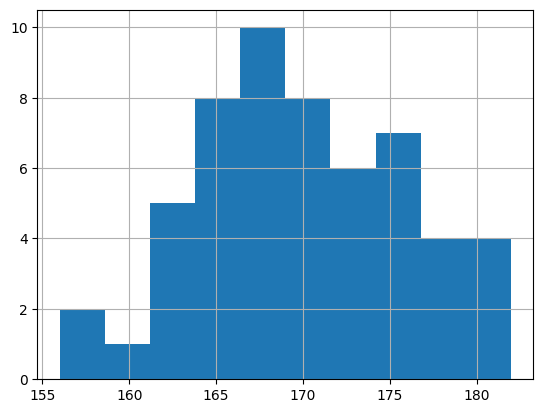

In [65]:
df['height'].hist()

# 신뢰구간  = 표본의 평균 +/- ( t(n-1) * 표본의 표준편차 / np.sqrt(표본크기))

## Q1. 55명 학생들의 키에 대한 표본 평균을 구하여라(반올림하여 소숫점 3째자리까지)

In [75]:
# 표본 데이터의 평균과 표준편차를 계산
mean = round(df['height'].mean(),3)
mean


169.937

## Q2. t분포 양쪽 꼬리에서의 t 값을 구하여라 (반올림하여 소수4째자리까지)

In [76]:
# t분포 (모집단의 분산을 모르니까)
from scipy.stats import t
t_value = round(t.ppf(0.975, df=54),4)
t_value

2.0049

In [78]:
std = df['height'].std()
std 

5.977625087231691

In [81]:
lower = round(mean - (t_value * std / np.sqrt(55)),3)
upper = round(mean + (t_value * std / np.sqrt(55)),3)
print(lower, upper)

168.321 171.553


## Q4. A,B,C 세 공장에서 생산한 동일한 제품의 길이 데이터다. 공장간의 제품 길이 차이가 유의미한지 확인 하려한다.

In [82]:
import pandas as pd 
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e5_p3_2.csv')
df.head()

,ID,value
0,A,84.179434
1,A,93.971003
2,A,62.140957
3,A,72.911723
4,A,79.252747


In [ ]:
df['ID'].value_counts()

ID
A    10
B    10
C    10
Name: count, dtype: int64

## Q5. 3 그룹의 데이터에 대해 크루스칼-왈리스 검정을 사용하여 검정 통계량을 반올림하여 소숫점 이하 3자리까지 구하여라

In [98]:
from scipy.stats import kruskal

group_A = df[df['ID'] == "A"]['value']
group_B = df[df['ID'] == "B"]['value']
group_C = df[df['ID'] == "C"]['value']

stat, p = kruskal(group_A, group_B, group_C)
round(stat,3)

6.521

## Q6. 3 그룹의 데이터에 대해 크루스칼-왈리스 검정을 사용하여 p-value를 반올림하여 소숫점 이하 3자리까지 구하여라. 귀무가설과 대립가설중 0.05 유의수준에서 유의한 가설을 출력하라

In [104]:
round(p,3)

0.038

In [103]:
H0 = "공장간의 제품의 모든 중앙값이 동일하다"
H1 = "적어도 한 그룹의 중앙값이 다른 그룹과 다르다"
H0 if round(p,3) >= 0.05 else H1

'적어도 한 그룹의 중앙값이 다른 그룹과 다르다'